# Inertial Waves Analytic Solutions

The inertial waves problem is given by
\begin{align}
i \lambda \vec{u} + 2 \vec{e}_z \times \vec{u} &= -\nabla p \\
\nabla \cdot \vec{u} &= 0
\end{align}
with $\vec{e}_r \cdot \vec{u} = 0$ at $r = 1$.

The pressure is then given by
\begin{align}
\lambda^2 \nabla^2 p - 4 \partial_z^2 p = 0.
\end{align}

Greenspan demonstrates inertial waves in the sphere are separable in the oblate spheroidal
coordinates
\begin{align}
r &= \left( \frac{4}{4-\lambda^2} - \eta^2 \right)^\frac{1}{2} \left(1 - \mu^2 \right)^\frac{1}{2} \\
z &= \left( \frac{4}{\lambda^2} - 1 \right)^\frac{1}{2} \eta \mu
\end{align}
such that the pressure satisfies
\begin{align}
P_{nkm} = \Psi_{nkm}(r,z) e^{i m \phi} = P_n^{|m|} \left( \eta/c_{nkm} \right) P_n^{|m|}(\mu) e^{i m \phi}
\end{align}
where
$$ c_{nkm} = \left( 1 - \frac{1}{4} \lambda_{nkm}^2 \right)^{-\frac{1}{2}} $$
and $\lambda_{nkm}$ is the $k$th eigenvalue solution of
\begin{align}
m P_n^{|m|}(z) = (1-z^2) \frac{d}{dz} P_n^{|m|}(z).
\end{align}

Note that the associated Legendre functions are given by
$$ P_n^{|m|}(z) = \left(1 - z^2 \right)^{\frac{m}{2}} P_{n-|m|}^{|m|,|m|}(z) $$
hence we find the roots of
\begin{align}
m (1+z) P_{n-|m|}^{|m|,|m|}(z) = (1-z^2) \frac{d}{dz} P_{n-|m|}^{|m|,|m|}(z).
\end{align}
\begin{align}
0 = \left[ m - (1-z) \frac{d}{dz} \right] P_{n-|m|}^{|m|,|m|}(z) = n P_{n-|m|}^{|m|-1,|m|+1}(z)
\end{align}
provided $m \ne 0$.

For $m = 0$ we have
\begin{align}
0 &= (1-z^2) \frac{d}{dz} P_{n-|m|}^{|m|,|m|}(z) \\
\implies 0 &= \frac{d}{dz} P_{n-|m|}^{|m|,|m|}(z) = \frac{n+|m|+1}{2} P_{n-|m|-1}^{(|m|+1,|m|+1)}(z) \\
\end{align}

In [1]:
import dedalus_sphere.jacobi as Jacobi

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from greenspan_inertial_waves import associated_legendre_nodes, compute_eigenvalues, compute_eigenmode

In [2]:
def plotfield(s, z, f, zoombox=None):
    fig, ax = plt.subplots(figsize=(4.25,6))
    im = ax.pcolormesh(s, z, f, cmap='RdBu')
    fig.colorbar(im, ax=ax)
    ax.set_xlabel('s')
    ax.set_ylabel('z')
    if zoombox is None:
        ax.set_aspect('equal', adjustable='box')
    else:
        ax.set_xlim(zoombox[0])
        ax.set_ylim(zoombox[1])
    fig.set_tight_layout(True)


In [3]:
# Compute the eigenvalues of the inertial waves problem
# for a given degree n and wavenumber m
n, m = 4, 1

roots = compute_eigenvalues(n, m)
for k in range(len(roots)):
    mu = roots[k]
    print('modes[({},{},{})] = {:1.6f}'.format(n,k+1,m,2*mu))


modes[(4,1,1)] = -0.820009
modes[(4,2,1)] = 0.611985
modes[(4,3,1)] = 1.708024


Greenspan Eigenvalue for mode (60,29,15): 0.675195


<IPython.core.display.Javascript object>


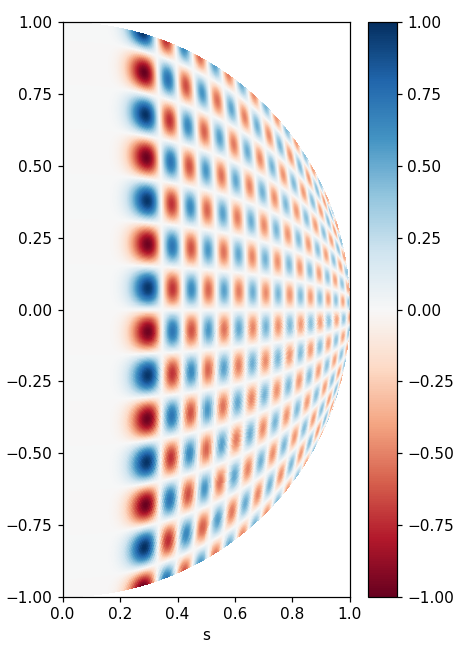

In [13]:
# Inertial wave parameters:
#   n: Associated Legendre degree
#   k: Index of eigenvalue
#   m: Azimuthal wavenumber
# n, k, m = 130, (130-95)//2, 96
n, k, m = 60, 29, 15

# Create the grid
ns, neta = 1000, 1001
s = np.linspace(0,1,1000).reshape((1,ns))
eta = np.linspace(-1,1,1001).reshape((neta,1))
z = eta*np.sqrt(1-s**2)

# Compute the mode
f = compute_eigenmode(s,z,n,k,m)

# Plot the field
plotfield(s, z, f)
